<a href="https://colab.research.google.com/github/ganesh3/pytorch-work/blob/master/Calculating_Derivatives_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is based on this [URL](https://machinelearningmastery.com/calculating-derivatives-in-pytorch/?__s=pfttrwkcbevnamwphr7v&utm_source=drip&utm_medium=email&utm_campaign=Calculating+derivatives+in+PyTorch&utm_content=Calculating+Derivatives+in+PyTorch) from Machine Learning Mastery. This is to learn the concept of derivatives and partial derivatives as well as some bit of latex 😀

## **Differentiation in Autograd**

In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
x = torch.tensor(3.0, requires_grad = True)
print("Creating a tensor x: ",x)

Creating a tensor x:  tensor(3., requires_grad=True)


We’ll use a simple equation y=3x**2 as an example and take the derivative with respect to variable x.

In [4]:
y = 3 * x**2
print("Result of the equation is: ", y)

Result of the equation is:  tensor(27., grad_fn=<MulBackward0>)


In [5]:
y.backward()
print("Dervative of the equation at x = 3 is: ", x.grad)

Dervative of the equation at x = 3 is:  tensor(18.)


PyTorch generates derivatives by building a backwards graph behind the scenes, while tensors and backwards functions are the graph’s nodes. PyTorch will not evaluate a tensor’s derivative if its leaf attribute is set to True

So, let’s check how the tensors x and y look internally once they are created. For x:

In [7]:
print("Data attribute of tensor x", x.data)
print("Gradient attribute of tensor x", x.grad)
print("grad_fn attribute of the tensor x",x.grad_fn)
print("is_leaf attribute of the tensor", x.is_leaf)
print("requires_grad attribute of the tensor", x.requires_grad)

Data attribute of tensor x tensor(3.)
Gradient attribute of tensor x tensor(18.)
grad_fn attribute of the tensor x None
is_leaf attribute of the tensor True
requires_grad attribute of the tensor True


For y:

In [13]:
print("Data attribute of tensor x", y.data)
print("Gradient attribute of tensor x", y.grad)
print("grad_fn attribute of the tensor x", y.grad_fn.name)
print("is_leaf attribute of the tensor", y.is_leaf)
print("requires_grad attribute of the tensor", y.requires_grad)

Data attribute of tensor x tensor(27.)
Gradient attribute of tensor x None
grad_fn attribute of the tensor x [<built-in method name of MulBackward0 object at 0x7f719ca674d0>]
is_leaf attribute of the tensor False
requires_grad attribute of the tensor True


The data attribute stores the tensor’s data while the grad_fn attribute tells about the node in the graph. Likewise, the .grad attribute holds the result of the derivative.

let’s take a little more complicated equation $y = 6x^2$+ $2x$ + $4$ and calculate the derivative.

In [14]:
x = torch.tensor(3.0, requires_grad = True)
y = 6 * x ** 2 + 2 * x + 4

In [16]:
print("Result of the equation y when x is substituted: ", y)

Result of the equation y when x is substituted:  tensor(64., grad_fn=<AddBackward0>)


In [17]:
#lets calculate the gradient w.r.t x
y.backward()
print("Derivate of the equation at x=3 is (12x+2): ", x.grad)

Derivate of the equation at x=3 is (12x+2):  tensor(38.)


## Implementing Partial Derivatives of Functions

PyTorch also allows us to calculate partial derivatives of the following functions $f(u,v) = u^2$ + $v^2 + 4uv$

The function $f$ partial derivative with respect to **$u$** is,

 $\dfrac{\partial f}{\partial u} = 3u^2$ + $4v$

 and

 The function $f$ partial derivative with respect to **$v$** is,

 $\dfrac{\partial f}{\partial v} = 2v$ + $4u$

In [26]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(4., requires_grad=True)
f = u**3 + v**2 + 4*u*v

In [27]:
print(u)
print(v)
print(f)

tensor(3., requires_grad=True)
tensor(4., requires_grad=True)
tensor(91., grad_fn=<AddBackward0>)


In [28]:
#claculate the gradient/partial derivative of function f
f.backward()

In [29]:
print("Partial derivative with respect to u: ", u.grad)
print("Partial derivative with respect to v: ", v.grad)

Partial derivative with respect to u:  tensor(43.)
Partial derivative with respect to v:  tensor(20.)


In [30]:
print("Data attribute of tensor x", u.data)
print("Data attribute of tensor x", v.data)
print("Data attribute of tensor x", f.data)

Data attribute of tensor x tensor(3.)
Data attribute of tensor x tensor(4.)
Data attribute of tensor x tensor(91.)


## Derivative of Functions with Multiple Values

What if we have a function with multiple values and we need to calculate the derivative with respect to its multiple values? For this, we’ll make use of the sum attribute to (1) produce a scalar-valued function, and then (2) take the derivative. This is how we can see the ‘function vs. derivative’ plot:

In [33]:
x = torch.linspace(-20, 20, 20, requires_grad=True)
Y = x ** 2

In [34]:
y = torch.sum(Y)
y.backward()

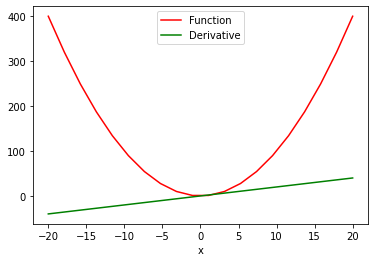

In [35]:
# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label= 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

The .detach method doesn’t allow the graph to further track the operations. This makes it easy for us to convert a tensor to a numpy array.

## **Summary**

In this tutorial, you learned how to implement derivatives on various functions in PyTorch.